# 神經網路NN
在 PyTorch 中，`nn.Module` 是所有神經網路模型的基類。你可以通過繼承 `nn.Module` 來定義你自己的網路。以下是創建一個簡單的全連接(feed-forward)神經網絡的步驟：

1. **定義一個繼承自 `nn.Module` 的類**：在你的類中，你需要定義網路層(layers)並在 `forward` 方法中指定數據如何通過網路。

2. **初始化網絡層**：在你的類的構造函數 `__init__` 中，你將實例化網絡層並將它們作為成員變量。

3. **實現 `forward` 方法**：`forward` 方法將定義數據通過網絡的方式。每次進行前向傳播時，這個方法都會被調用。

4. **創建模型實例**：一旦你定義了模型類，你可以創建它的實例並對其進行訓練和評估。



## 多層感知器（MLP）
### 理論介紹:
多層感知機（Multilayer Perceptron, MLP）是一種前饋神經網絡，由多層神經元組成，每層之間的神經元全連接。MLP是最基本的深度學習模型之一，常用於分類和迴歸任務。

結構：

- 輸入層（Input Layer）：接收數據輸入。
- 隱藏層（Hidden Layers）：由多個神經元組成，負責學習數據的特徵。隱藏層之間使用激活函數來引入非線性。
- 輸出層（Output Layer）：生成最終的預測結果。
活化函數：

常見的激活函數有ReLU（Rectified Linear Unit）、Sigmoid和Tanh等。ReLU因其簡單高效，被廣泛應用於隱藏層。

損失函數：

損失函數用於衡量模型預測結果與真實值之間的差異。對於分類任務，常用的損失函數是交叉熵損失（Cross-Entropy Loss）。

優化器：

優化器用於更新模型參數，以最小化損失函數。常用的優化器有隨機梯度下降（SGD）和Adam等。

In [1]:
# 第一步 import
import torch
import torch.nn as nn  #神經網路用
import torch.optim as optim #優化器用


In [3]:
#OPTIM
print(dir(optim))

['ASGD', 'Adadelta', 'Adagrad', 'Adam', 'AdamW', 'Adamax', 'LBFGS', 'NAdam', 'Optimizer', 'RAdam', 'RMSprop', 'Rprop', 'SGD', 'SparseAdam', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_functional', '_multi_tensor', 'lr_scheduler', 'swa_utils']


這邊介紹一些優化器

- SGD -> 純梯度下降 #見numpy講義
- MSGD -> 加入一點動量的SGD
- AdaGrad ->自動改learning rate
- RMSProp -> AdaGrad改良
- Adam -> RMSProp+ MSGD 之集大成
[Adam](https://hackmd.io/@kk6333/rJ553YG1s)

In [41]:
#開始建置模型 -> 簡單的線性模型

class Net(nn.Module): #從nn.Module複製進我們的class裡
    def __init__(self):
        super(Net, self).__init__() #有些數值我們想自己改，所以用super
        # 定義輸出層：2個隱藏神經元，1個輸出神經元
        self.output = nn.Linear(1, 1, dtype=torch.double)

    def forward(self, x):
        x = self.output(x)
        return x


In [42]:
model = Net()
model

Net(
  (output): Linear(in_features=1, out_features=1, bias=True)
)

In [43]:
data = torch.tensor([[1.061],[1.0734],[1.0866],[1.048]],dtype=torch.double)
label = torch.tensor([[1.125721],[1.15218756],[1.18069956],[1.098304]],dtype=torch.double)

In [44]:
data

tensor([[1.0610],
        [1.0734],
        [1.0866],
        [1.0480]], dtype=torch.float64)

In [45]:
label

tensor([[1.1257],
        [1.1522],
        [1.1807],
        [1.0983]], dtype=torch.float64)

In [46]:
criterion = nn.MSELoss() #距離平方
optimizer = optim.SGD(model.parameters(),lr=1e-2)
criterion

MSELoss()

In [57]:
from tqdm import trange #progress bar->好看用
epochs = 100000
for epoch in trange(epochs):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, label)
    loss.backward() #反向傳播->numpy講義
    optimizer.step()
    #time.sleep(0.01)
    #print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')


100%|█████████████████████████████████| 100000/100000 [00:16<00:00, 6200.81it/s]


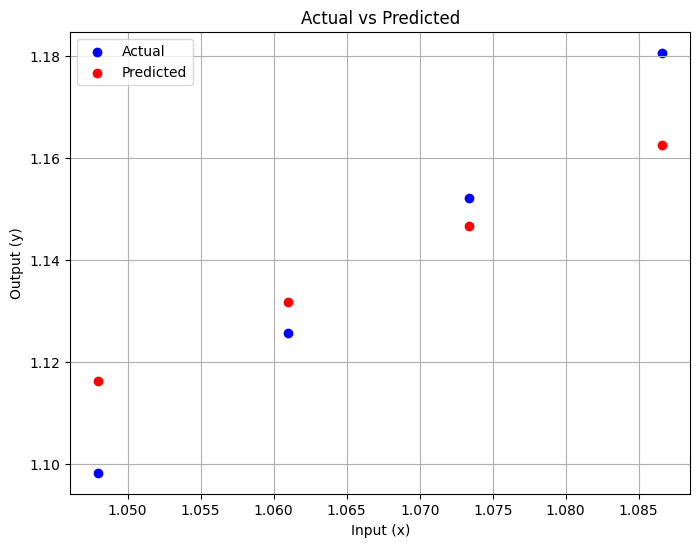

In [56]:
#繪圖
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(data.numpy(), label.numpy(), color='b', label='Actual')  # 實際標籤點
plt.scatter(data.numpy(), model(data).detach().numpy(), color='r', label='Predicted')  # 模型預測點
plt.title('Actual vs Predicted')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.grid(True)
plt.show()

#### 常見的活化函數:
剛剛沒用到，但這事讓神經網路更加厲害的關鍵(讓他非線性)
numpy講義會畫出圖形來

##### **Sigmoid**(處理二元分類): $$\sigma(x) = \frac{1}{1 + e^{-x}}$$

##### **Tanh**(更陡的Sigmoid): $$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

##### **ReLU**(去掉負號): $$\text{ReLU}(x) = \max(0, x)$$


#### 加總:
##### **Softmax**(多元分類): $$\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{K} e^{x_j}}$$

In [59]:
# Create a sigmoid layer
sigmoid_layer = nn.Sigmoid()

# Create a tensor
tensor = torch.tensor([-1.0, 0.0, 1.0])

# Apply the sigmoid layer to the tensor
sigmoid_output = sigmoid_layer(tensor)

print(sigmoid_output)

############################

# Create a ReLU layer
relu_layer = nn.ReLU()

# Create a tensor
tensor = torch.tensor([-100.0, 0.0, 1.0])

# Apply the sigmoid layer to the tensor
relu_output = sigmoid_layer(tensor)

print(relu_output)

############################

# Create a Softmax layer
softmax_layer = nn.Softmax(dim=1)  # 'dim' specifies the dimension along which Softmax will be computed

# Create a tensor (for example, logits from a neural network's output)
logits = torch.tensor([[1.0, 2.0, 3.0]])

# Apply the Softmax layer to the logits
softmax_output = softmax_layer(logits)

print(softmax_output)


tensor([0.2689, 0.5000, 0.7311])
tensor([0.0000, 0.5000, 0.7311])
tensor([[0.0900, 0.2447, 0.6652]])


# XOR題目
在神經網絡中，XOR（互斥或）問題是一個經典問題，它通常用來展示非線性分類的能力。XOR是一個簡單的二元輸入、一個輸出的函數，當且僅當一個輸入為1而另一個輸入為0時，輸出為1；否則輸出為0。這不能通過一個單一的線性模型來解決，因為XOR函數不是線性可分的，所以需要至少一個隱藏層的神經網絡。

#### Hint:
```python
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)

data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
labels = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)

```

# 解答

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定義網絡結構
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # 兩個輸入到兩個隱藏神經元
        self.fc2 = nn.Linear(2, 1)  # 兩個隱藏神經元到一個輸出

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))  # 使用 sigmoid 激活函數
        x = self.fc2(x)
        return x

# 創建網絡實例
net = XORNet()

# 定義損失函數和優化器
criterion = nn.MSELoss()  # 均方誤差損失
optimizer = optim.SGD(net.parameters(), lr=0.1)  # 隨機梯度下降優化器

# XOR 數據和標籤
data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
labels = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)

# 訓練網絡
for epoch in range(1000):  # 訓練1000次
    optimizer.zero_grad()  # 清除之前的梯度
    output = net(data)  # 前向傳播
    loss = criterion(output, labels)  # 計算損失
    loss.backward()  # 反向傳播
    optimizer.step()  # 更新權重

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/1000] Loss: {loss.item()}')

# 測試網絡
with torch.no_grad():
    for inputs, label in zip(data, labels):
        output = net(inputs)
        print(f'Input: {inputs} Output: {output.round()} Label: {label}')


Epoch [0/1000] Loss: 1.607999324798584
Epoch [100/1000] Loss: 0.2516259551048279
Epoch [200/1000] Loss: 0.2511095106601715
Epoch [300/1000] Loss: 0.2508012652397156
Epoch [400/1000] Loss: 0.2506028711795807
Epoch [500/1000] Loss: 0.25046780705451965
Epoch [600/1000] Loss: 0.2503718137741089
Epoch [700/1000] Loss: 0.2503012716770172
Epoch [800/1000] Loss: 0.25024792551994324
Epoch [900/1000] Loss: 0.25020673871040344
Input: tensor([0., 0.]) Output: tensor([1.]) Label: tensor([0.])
Input: tensor([0., 1.]) Output: tensor([0.]) Label: tensor([1.])
Input: tensor([1., 0.]) Output: tensor([1.]) Label: tensor([1.])
Input: tensor([1., 1.]) Output: tensor([0.]) Label: tensor([0.])
